In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
VA_accidents = pd.read_csv('VA_accidents.csv')

In [71]:
# Attribute information of VA_accident data set
VA_accidents.columns


Index(['Unnamed: 0', 'ID', 'Source', 'TMC', 'Severity', 'Start_Time',
       'End_Time', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
       'Distance(mi)', 'Description', 'Number', 'Street', 'Side', 'City',
       'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [72]:
# From this we can analyze dataset for performing preprocessing 
VA_accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61426 entries, 0 to 61425
Data columns (total 50 columns):
Unnamed: 0               61426 non-null int64
ID                       61426 non-null object
Source                   61426 non-null object
TMC                      47298 non-null float64
Severity                 61426 non-null int64
Start_Time               61426 non-null object
End_Time                 61426 non-null object
Start_Lat                61426 non-null float64
Start_Lng                61426 non-null float64
End_Lat                  14128 non-null float64
End_Lng                  14128 non-null float64
Distance(mi)             61426 non-null float64
Description              61426 non-null object
Number                   19759 non-null float64
Street                   61426 non-null object
Side                     61426 non-null object
City                     61426 non-null object
County                   61426 non-null object
State                    61426 non-null 

In [73]:
# Since End_Lat, End_long,Wind_chill(F),Precipitation(in) have more number of missing values it is difficult to replace them 
# So, it is better to drop those columns
VA_accidents = VA_accidents.drop(columns=['End_Lat','End_Lng','Wind_Chill(F)','Precipitation(in)','Number'])

In [74]:
# ID represents Unique identity of the accident, So we cannot use it in the analysis
VA_accidents = VA_accidents.drop(columns = ['ID'])

In [75]:
# Country and state values are same for all the records(US and VA), so these columns can be removed
VA_accidents = VA_accidents.drop(columns = ['State','Country'])

In [76]:
VA_accidents = VA_accidents.drop(columns = ['Unnamed: 0'])

In [77]:
# TMC represents Traffic Message Channel, this attribute doesn't make any sense in analysis
VA_accidents = VA_accidents.drop(columns = ['TMC'])

In [78]:
#Rename columns
VA_accidents=VA_accidents.rename(columns={'Distance(mi)':'Distance','Temperature(F)':'Temperature','Humidity(%)':'Humidity',
                            'Pressure(in)':'Pressure','Visibility(mi)':'Visibility','Wind_Speed(mph)':'Wind_Speed'})

In [79]:
# Zip code attribute has just three missing values
for index,row in VA_accidents.iterrows():
    if (pd.isnull(row['Zipcode'])):
        print(index,row)

28979 Source                                                            MapQuest
Severity                                                                 2
Start_Time                                             2018-05-12 09:58:24
End_Time                                               2018-05-12 10:27:41
Start_Lat                                                          37.0303
Start_Lng                                                          -76.085
Distance                                                                 0
Description              Left lane blocked due to accident on US-50 Eas...
Street                                                             US-13 N
Side                                                                     R
City                                                            District 1
County                                                         Northampton
Zipcode                                                                NaN
Timezone           

In [80]:
# For the rows that contain Zipcode also has null value to many attributes, so dropping those 3 attributes is better solution
VA_accidents = VA_accidents.dropna(subset = ['Zipcode'])

In [81]:
cnt = 0
for index,row in VA_accidents.iterrows():
    if (pd.isnull(row['Weather_Timestamp'])):
        cnt = cnt+1
print(cnt)
# HAs all the attributes of Temperature, Pressure, Visibility,Wind_Direction,Wind_Speed,Humidity as null

3840


In [82]:
# From the above result we can see that 3840 records have Temperature,Pressure,Visibility, Wind_Direction,Wind_Speed and Humidity 
#values NUll in total
VA_accidents = VA_accidents.dropna(subset = ['Temperature'])

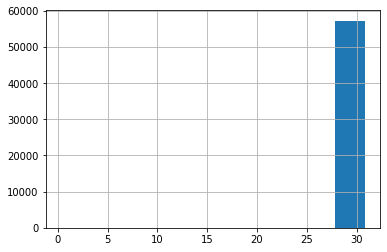

In [83]:
## histogram for pressure
VA_accidents['Pressure'].hist()

In [84]:
# From the graph we can see almost all the data is concentrated near 30 inches
mean = VA_accidents['Pressure'].mean()
median = VA_accidents['Pressure'].median()
mode = VA_accidents['Pressure'].mode()
print('mean', mean)
print('median',median)
print('mode',mode)

mean 30.08670645392417
median 30.08
mode 0    30.06
dtype: float64


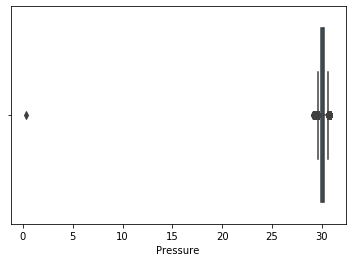

In [85]:
# Identifying outliers in Pressure attribute
sns.boxplot(VA_accidents['Pressure'])

In [86]:
# Replacing Missing values in pressure with mode
mode_Pressure = VA_accidents['Pressure'].mode()
for index,row in VA_accidents.iterrows():
    if(np.isnan(row['Pressure'])):
        VA_accidents.at[index,'Pressure'] = mode_Pressure

In [87]:
# Replacing outliers in Pressure attribute with mode
mode_Pressure = VA_accidents['Pressure'].mode()
# From the box plot we see that there is an outlier, Here we replaced it with median of data 
Q1 = np.nanpercentile(VA_accidents['Pressure'],25)
Q3 = np.nanpercentile(VA_accidents['Pressure'],75)
IQR = Q3 - Q1
for index,row in VA_accidents.iterrows():
    if((row['Pressure'] < Q1 - 1.5*(IQR)) | (row['Pressure'] > Q3 + 1.5*(IQR))):
        VA_accidents.at[index,'Pressure'] = mode_Pressure
   

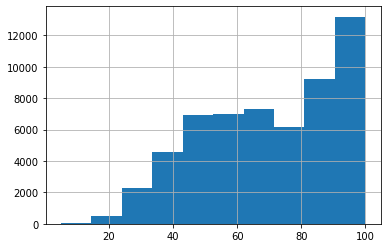

In [88]:
# Understanding the spread of data in Humidity
VA_accidents['Humidity'].hist()

In [89]:
# Replacing Missing values in Humidity with median
median_humidity = VA_accidents['Humidity'].median()
VA_accidents['Humidity'].fillna(median_humidity,inplace=True)

In [90]:
# Replacing NA values in Weather_Condition with missing values
VA_accidents['Weather_Condition'].fillna("missing",inplace=True)

In [91]:
# Replacing missing values in Visibility, with the mean value grouped from each type
list = VA_accidents['Visibility'].groupby(VA_accidents['Weather_Condition']).mean()
for index,row in VA_accidents.iterrows():
    if(np.isnan(row['Visibility'])):
        VA_accidents.at[index,'Visibility'] = list[row['Weather_Condition']]

In [92]:
VA_accidents['Weather_Condition'].unique()

array(['Overcast', 'Light Drizzle', 'Partly Cloudy', 'Light Rain', 'Rain',
       'Heavy Rain', 'Clear', 'Mostly Cloudy', 'Scattered Clouds',
       'Light Ice Pellets', 'Heavy Drizzle', 'Light Freezing Rain',
       'missing', 'Fog', 'Light Snow', 'Haze', 'Drizzle', 'Squalls',
       'Light Fog', 'Light Thunderstorms and Rain',
       'Thunderstorms and Rain', 'Patches of Fog', 'Shallow Fog',
       'Thunderstorm', 'Heavy Thunderstorms and Rain',
       'Light Freezing Fog', 'Ice Pellets', 'Mist', 'Snow', 'Heavy Snow',
       'Light Freezing Drizzle', 'Blowing Snow'], dtype=object)

In [93]:
# Replacing missing values in Wind_Speed
#There is only one record  with Light Fog value, So replaced it with Fog Type weather_condition for replacing its Wind_speed 
#missing value 
list1 = VA_accidents['Wind_Speed'].groupby(VA_accidents['Weather_Condition']).mean()
for index,row in VA_accidents.iterrows():
    if(np.isnan(row['Wind_Speed'])):
        VA_accidents.at[index,'Wind_Speed'] = list1[row['Weather_Condition']]

In [94]:
for index,row in VA_accidents.iterrows():
    if(np.isnan(row['Wind_Speed'])):
        VA_accidents.at[index,'Wind_Speed']= 5.17

In [95]:
VA_accidents.groupby('Weather_Condition')['Wind_Speed'].mean()

Weather_Condition
Blowing Snow                    16.840000
Clear                            7.748444
Drizzle                          6.495522
Fog                              5.171910
Haze                             6.862162
Heavy Drizzle                    8.850000
Heavy Rain                       8.969029
Heavy Snow                       9.314286
Heavy Thunderstorms and Rain    10.271212
Ice Pellets                     19.575000
Light Drizzle                    7.300346
Light Fog                        5.170000
Light Freezing Drizzle           7.812500
Light Freezing Fog               9.963636
Light Freezing Rain              6.788372
Light Ice Pellets               14.630000
Light Rain                       8.895008
Light Snow                       9.223673
Light Thunderstorms and Rain     8.664474
Mist                             6.841667
Mostly Cloudy                    8.884052
Overcast                         8.089789
Partly Cloudy                    8.897007
Patches of Fog  

In [96]:
#Zipcode formatting
for index,row in VA_accidents.iterrows():
    if('-' in row['Zipcode']):
        VA_accidents.at[index,'Zipcode'] = (row['Zipcode'].split('-'))[0]

In [97]:
VA_accidents['Month'] = 0
VA_accidents['Year'] = 0
# Extracting Month, year from data
for index,row in VA_accidents.iterrows():
    list = row['Weather_Timestamp'].split('-')
    VA_accidents.at[index,'Month'] = list[1]
    VA_accidents.at[index,'Year'] = list[0]

In [98]:
VA_accidents['accidentPlaceOccurrence'] = 0
for index,row in VA_accidents.iterrows():
    if(row['Traffic_Signal']):
        VA_accidents.at[index,'accidentPlaceOccurrence'] += 1
    if(row['Amenity']):
        VA_accidents.at[index,'accidentPlaceOccurrence'] += 1
    if(row['Junction']):
        VA_accidents.at[index,'accidentPlaceOccurrence'] += 1
    if(row['Bump']):
        VA_accidents.at[index,'accidentPlaceOccurrence'] += 1
    if(row['Crossing']):
        VA_accidents.at[index,'accidentPlaceOccurrence'] += 1
    if(row['Give_Way']):
        VA_accidents.at[index,'accidentPlaceOccurrence'] += 1
    if(row['No_Exit']):
        VA_accidents.at[index,'accidentPlaceOccurrence'] += 1
    if(row['Railway']):
        VA_accidents.at[index,'accidentPlaceOccurrence'] += 1
    if(row['Roundabout']):
        VA_accidents.at[index,'accidentPlaceOccurrence'] += 1
    if(row['Station']):
        VA_accidents.at[index,'accidentPlaceOccurrence'] += 1
    if(row['Traffic_Calming']):
        VA_accidents.at[index,'accidentPlaceOccurrence'] += 1
    if(row['Turning_Loop']):
        VA_accidents.at[index,'accidentPlaceOccurrence'] += 1
    
    

In [99]:
# Finall Pre-processed Dataset
VA_accidents.to_csv('VA_accidents_final.csv',index = False)